In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [62]:
data = pd.read_csv("train.csv")

In [63]:
data.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
22041,22041,0.30,Ideal,E,VVS2,61.9,57.0,4.31,4.28,2.66,6.921
9012,9012,0.50,Ideal,H,SI1,62.2,53.0,5.06,5.14,3.17,7.051
28404,28404,1.00,Very Good,E,SI2,63.5,56.0,6.37,6.30,4.02,8.233
19503,19503,1.51,Premium,F,VS2,62.9,61.0,7.31,7.22,4.57,9.543
13356,13356,0.31,Premium,E,VS2,60.0,59.0,4.35,4.39,2.62,6.522
8208,8208,1.00,Good,D,VS2,63.6,56.0,6.38,6.27,4.02,8.639
25441,25441,0.33,Ideal,G,IF,62.7,56.0,4.39,4.44,2.77,6.758
11088,11088,0.31,Ideal,G,VS2,62.7,57.0,4.31,4.34,2.71,6.299
22529,22529,0.50,Good,G,VVS2,63.9,58.0,5.05,5.00,3.21,7.499
15442,15442,0.60,Premium,D,SI2,62.0,57.0,5.43,5.35,3.34,7.087


In [64]:
data.shape

(40455, 11)

At first sight, we cannot decide any further step to improve our data. So we are gonna find if exists any relation between our target variable and the most important feature, which is carat.

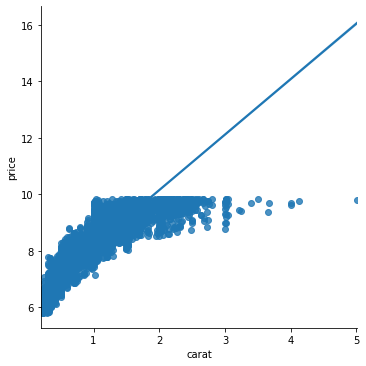

In [65]:
sns.lmplot(x="carat", y=("price"), data=data)

In [66]:
data["price"] = np.log10(data["price"])

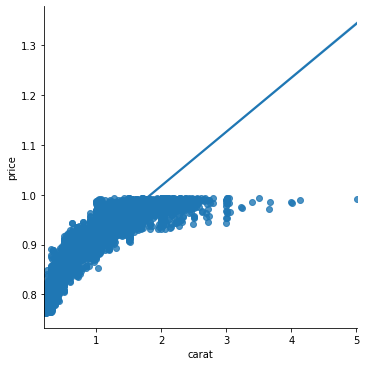

In [67]:
sns.lmplot(x="carat", y=("price"), data=data)

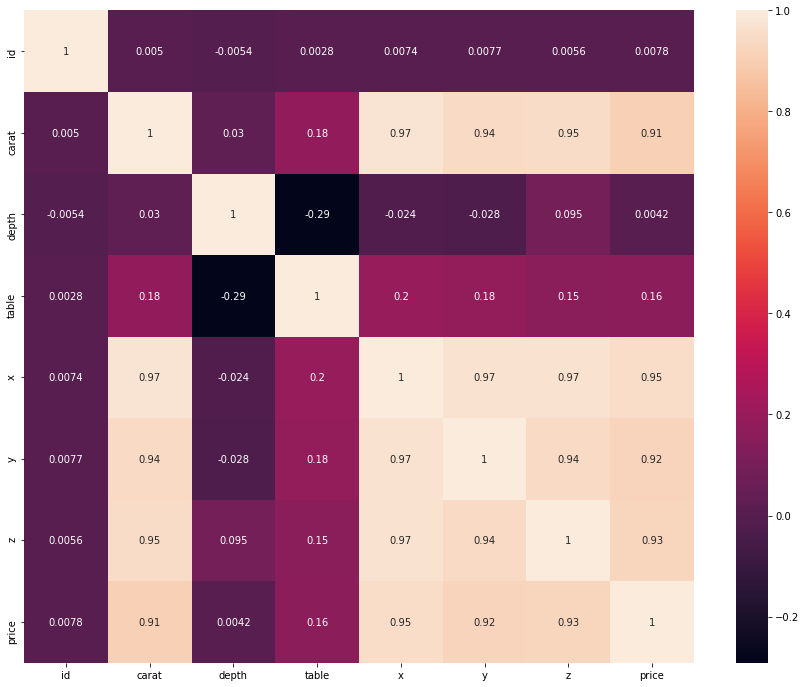

In [68]:
corrMatrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [69]:
dic_para_hot = { "Premium": 0.9,
                "Very Good": 0.7,
                "Good": 0.5,
                "Ideal":0.3,
                "Fair":0.1,
                
}
data.cut = data.cut.map(dic_para_hot)

In [70]:
dic_para_hot = { "D": 1,
                "E": 0.85,
                "F": 0.7,
                "G":0.55,
                "H":0.4,
                "I":0.25,
                "J":0.1
}
data.color = data.color.map(dic_para_hot)

In [71]:
dic_para_hot = { "IF": 1,
                "VVS1": 0.87,
                "VVS2": 0.74,
                "VS1":0.61,
                "VS2":0.48,
                "SI1":0.35,
                "SI2":0.22,
                "I1":0.09
}
data.clarity = data.clarity.map(dic_para_hot)

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [73]:
X = data.drop(columns = ["id","x", "y", "z", "table", "price"])
y = data.price

In [74]:
data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,0.9,0.55,0.61,62.7,58.0,6.36,6.31,3.97,0.942207
1,1,0.60,0.5,0.55,0.48,64.3,57.0,5.31,5.38,3.43,0.874598
2,2,1.60,0.9,0.40,0.22,59.4,59.0,7.55,7.60,4.50,0.954725
3,3,0.30,0.7,0.10,0.61,63.5,58.0,4.27,4.24,2.70,0.794279
4,4,1.00,0.7,0.70,0.22,62.8,57.0,6.37,6.44,4.02,0.919810
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,0.3,0.85,0.48,62.5,55.0,5.08,5.13,3.19,0.869935
40451,40451,0.80,0.3,0.40,0.48,62.1,54.0,5.96,5.99,3.71,0.903958
40452,40452,1.53,0.9,0.55,0.22,58.7,59.0,7.51,7.45,4.39,0.957607
40453,40453,1.51,0.3,0.25,0.48,61.6,54.0,7.38,7.42,4.57,0.963741


In [75]:
lr.fit(X, y)


LinearRegression()

In [76]:
y_pred = lr.predict(X)

In [77]:
from sklearn import metrics
import statsmodels.formula.api as smf

In [78]:
print("MAE: " , metrics.mean_absolute_error(data.price, y_pred))
print("MSE: " , metrics.mean_squared_error(data.price, y_pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(data.price, y_pred)))


MAE:  0.017737449090331738
MSE:  0.0004839622594032171
RMSE:  0.02199914224244248


In [79]:
results = smf.ols("price ~ carat + depth + cut + color + clarity ", data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 4.619e+04
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        13:08:33   Log-Likelihood:                 97004.
No. Observations:               40455   AIC:                        -1.940e+05
Df Residuals:                   40449   BIC:                        -1.939e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7809      0.005    158.403      0.000       0.771       0.791
carat          0.1196      0.000    458.854      0.000       0.119       0.120
depth         -0.0004   7.79e-05     -5.370      0.000      -0.001      -0.000
cut           -0.0013      0.000     -2.999      0.003      -0.002      -0.000
color          0.0328      0.000     72.163      0.000       0.032       0.034
clarity        0.0366      0.001     65.759      0.000       0.036       0.038
==============================================================================
Omnibus:                    12306.157   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79173.660
Skew:                          -1.309   Prob(JB):                         0.00
Kurtosis:                       9.334   Cond. No.                     2.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
data_test = pd.read_csv("./test.csv")

In [128]:
data_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36


In [129]:
dic_para_hot = { "Premium": 0.9,
                "Very Good": 0.7,
                "Good": 0.5,
                "Ideal":0.3,
                "Fair":0.1,
                
}
data_test.cut = data_test.cut.map(dic_para_hot)

In [130]:
dic_para_hot = { "D": 1,
                "E": 0.85,
                "F": 0.7,
                "G":0.55,
                "H":0.4,
                "I":0.25,
                "J":0.1
}
data_test.color = data_test.color.map(dic_para_hot)

In [131]:
dic_para_hot = { "IF": 1,
                "VVS1": 0.87,
                "VVS2": 0.74,
                "VS1":0.61,
                "VS2":0.48,
                "SI1":0.35,
                "SI2":0.22,
                "I1":0.09
}
data_test.clarity = data_test.clarity.map(dic_para_hot)

In [132]:
data_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.01,0.3,0.40,0.35,61.9,57.0,8.14,8.05,5.01
1,1,0.49,0.5,1.00,0.61,57.5,60.0,5.18,5.25,3.00
2,2,1.03,0.9,0.70,0.35,58.6,62.0,6.65,6.60,3.88
3,3,0.90,0.7,0.85,0.35,63.0,56.0,6.11,6.15,3.86
4,4,0.59,0.3,1.00,0.35,62.5,55.0,5.35,5.40,3.36


In [133]:
X_test = data_test.drop(columns = ["id","x", "y", "z", "table"])


In [134]:
X_test

,carat,cut,color,clarity,depth
0,2.01,0.3,0.40,0.35,61.9
1,0.49,0.5,1.00,0.61,57.5
2,1.03,0.9,0.70,0.35,58.6
3,0.90,0.7,0.85,0.35,63.0
4,0.59,0.3,1.00,0.35,62.5
...,...,...,...,...,...
13480,0.41,0.5,0.70,0.09,63.8
13481,2.05,0.7,0.40,0.48,63.5
13482,2.22,0.9,0.25,0.48,60.5
13483,0.51,0.3,0.85,0.22,58.3


In [135]:
y_pred_test = lr.predict(X_test)

In [136]:
y_pred_test

array([1.02083702, 0.86986316, 0.91409926, ..., 1.04559362, 0.8529915 ,
       0.85908616])

In [137]:
data_test["price"] = y_pred_test

In [138]:
data_test.drop(columns = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"], inplace = True)

In [139]:
model_1 = data_test

In [140]:
model_1.head()

,id,price
0,0,1.020837
1,1,0.869863
2,2,0.914099
3,3,0.901890
4,4,0.870471


In [141]:
data_test.shape

(13485, 2)

In [142]:
model_1.to_csv("model_1.csv")